In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
data=pd.read_csv('ikea2.csv')
data.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,product_description,current_status,kewords,topic_group,topic_desc
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,Item discontinued,Item discontinued,NaN,NaN,NaN
1,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,Item discontinued,Item discontinued,NaN,NaN,NaN
2,50420329,FREKVENS,Bar furniture,177.0,SR 295,True,https://www.ikea.com/sa/en/p/frekvens-bar-stoo...,No,"Bar stool with backrest, in/outdoor, ...",Nicholai Wiig Hansen,53.0,104.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
3,400550,EKEDALEN,Bar furniture,345.0,No old price,True,https://www.ikea.com/sa/en/p/ekedalen-bar-stoo...,No,"Bar stool with backrest, 75 cm",Ehl√©n Johansson,52.0,114.0,43.0,Item discontinued,Item discontinued,NaN,NaN,NaN
4,40426138,HENRIKSDAL,Bar furniture,395.0,No old price,True,https://www.ikea.com/sa/en/p/henriksdal-bar-st...,No,"Bar stool with backrest frame, ...",Karl Malmvall,51.0,102.0,40.0,Item discontinued,Item discontinued,NaN,NaN,NaN


In [16]:
data.shape

(3694, 18)

In [17]:
data.describe()

,item_id,price,depth,height,width,topic_group
count,3.694000e+03,3694.000000,2231.000000,2706.000000,3105.000000,1409.000000
mean,4.863240e+07,1078.208419,54.379202,101.679970,104.470853,1.102910
std,2.888709e+07,1374.652494,29.958351,61.097585,71.133771,0.852835
min,5.848700e+04,3.000000,1.000000,1.000000,1.000000,0.000000
25%,2.039057e+07,180.900000,38.000000,67.000000,60.000000,0.000000
50%,4.928808e+07,544.700000,47.000000,83.000000,80.000000,1.000000
75%,7.040357e+07,1429.500000,60.000000,124.000000,140.000000,2.000000
max,9.993262e+07,9585.000000,257.000000,700.000000,420.000000,2.000000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   item_id              3694 non-null   int64  
 1   name                 3694 non-null   object 
 2   category             3694 non-null   object 
 3   price                3694 non-null   float64
 4   old_price            3694 non-null   object 
 5   sellable_online      3694 non-null   bool   
 6   link                 3694 non-null   object 
 7   other_colors         3694 non-null   object 
 8   short_description    3694 non-null   object 
 9   designer             3694 non-null   object 
 10  depth                2231 non-null   float64
 11  height               2706 non-null   float64
 12  width                3105 non-null   float64
 13  product_description  3694 non-null   object 
 14  current_status       3694 non-null   object 
 15  kewords              1394 non-null   o

In [32]:
data.rename(columns={'kewords': 'keywords'}, inplace=True)

Handle Missing Values: Identify and handle missing values in columns such as depth, keywords, topic_group, and topic_desc.

In [33]:
data.isnull().sum()

item_id                   0
name                      0
category                  0
price                     0
old_price                 0
sellable_online           0
link                      0
other_colors              0
short_description         0
designer                  0
depth                  1463
height                  988
width                   589
product_description       0
current_status            0
keywords               2300
topic_group            2285
topic_desc             2285
dtype: int64

In [35]:
data['keywords'].value_counts()

keywords
white keep neat lets use Find suitable use humid                                     23
fitted online stylish                                                                18
white build wide low different create perfect clean modern easy place                16
white icing small makes big Clean discreet blend right enhance modern                15
light white stained need good ‚Äì sturdy wooden lightweight slide put                13
                                                                                     ..
store high it‚Äôs difficult reach makes reach 's nice look makes reach store high     1
ergonomic keeps comfy focused adjustable tilt help relax Suitable                     1
white looks nice dining solid stands Solid hardwearing natural                        1
white looks nice dining solid stands                                                  1
white 135x51x222-350 Make lovely decorative adjustable help utilise full              1
Name: count, Length: 72

In [36]:
data['height'].value_counts()

height
74.0     189
236.0    113
75.0      82
73.0      77
83.0      73
        ... 
34.0       1
24.0       1
31.0       1
58.0       1
208.0      1
Name: count, Length: 193, dtype: int64

In [37]:
data['topic_desc'].value_counts()

topic_desc
Durability and Appearance          592
Color and Aesthetics, Usability    447
Style and Functionality            370
Name: count, dtype: int64

In [38]:
data['topic_group'].value_counts()

topic_group
2.0    592
0.0    447
1.0    370
Name: count, dtype: int64

Standardize Columns: Convert relevant columns to consistent data types (e.g., price and old_price).


In [39]:
data['old_price'].value_counts()

old_price
No old price    3040
SR 995            12
SR 1.385          11
SR 595            10
SR 275             8
                ... 
SR 1.010           1
SR 3.045           1
SR 5.725           1
SR 2.525           1
SR 1.755           1
Name: count, Length: 365, dtype: int64

In [40]:
data['price'].value_counts()

price
395.0     66
25.0      54
195.0     54
175.0     51
995.0     51
          ..
729.0      1
4345.0     1
1247.0     1
2616.4     1
1572.0     1
Name: count, Length: 979, dtype: int64

In [41]:
data['old_price'].value_counts()

old_price
No old price    3040
SR 995            12
SR 1.385          11
SR 595            10
SR 275             8
                ... 
SR 1.010           1
SR 3.045           1
SR 5.725           1
SR 2.525           1
SR 1.755           1
Name: count, Length: 365, dtype: int64

In [42]:
print(data['old_price'].isnull().sum())    # Yəni 654 sətir  boşdur
print("--------------")
print(data['old_price'].value_counts().sum())     # Yəni 3040 sətir var

0
--------------
3694


In [43]:
print(data.isnull().sum())  # NaN olan dəyərlərin sayı

item_id                   0
name                      0
category                  0
price                     0
old_price                 0
sellable_online           0
link                      0
other_colors              0
short_description         0
designer                  0
depth                  1463
height                  988
width                   589
product_description       0
current_status            0
keywords               2300
topic_group            2285
topic_desc             2285
dtype: int64


In [44]:
total_rows = len(data)

nan_percent=(data.isnull().sum()/total_rows)*100
nan_percent = nan_percent.round(2)
print(nan_percent)

item_id                 0.00
name                    0.00
category                0.00
price                   0.00
old_price               0.00
sellable_online         0.00
link                    0.00
other_colors            0.00
short_description       0.00
designer                0.00
depth                  39.60
height                 26.75
width                  15.94
product_description     0.00
current_status          0.00
keywords               62.26
topic_group            61.86
topic_desc             61.86
dtype: float64


In [45]:
correlation_matrix = data.corr(numeric_only=True)
print(correlation_matrix)

                  item_id     price  sellable_online     depth    height  \
item_id          1.000000  0.062683         0.015255  0.037860  0.050827   
price            0.062683  1.000000         0.040226  0.630212  0.278621   
sellable_online  0.015255  0.040226         1.000000  0.069356  0.050117   
depth            0.037860  0.630212         0.069356  1.000000 -0.078930   
height           0.050827  0.278621         0.050117 -0.078930  1.000000   
width            0.066825  0.697276         0.063574  0.433480  0.379496   
topic_group     -0.027098 -0.053425        -0.074468 -0.069800 -0.093773   

                    width  topic_group  
item_id          0.066825    -0.027098  
price            0.697276    -0.053425  
sellable_online  0.063574    -0.074468  
depth            0.433480    -0.069800  
height           0.379496    -0.093773  
width            1.000000    -0.060670  
topic_group     -0.060670     1.000000  


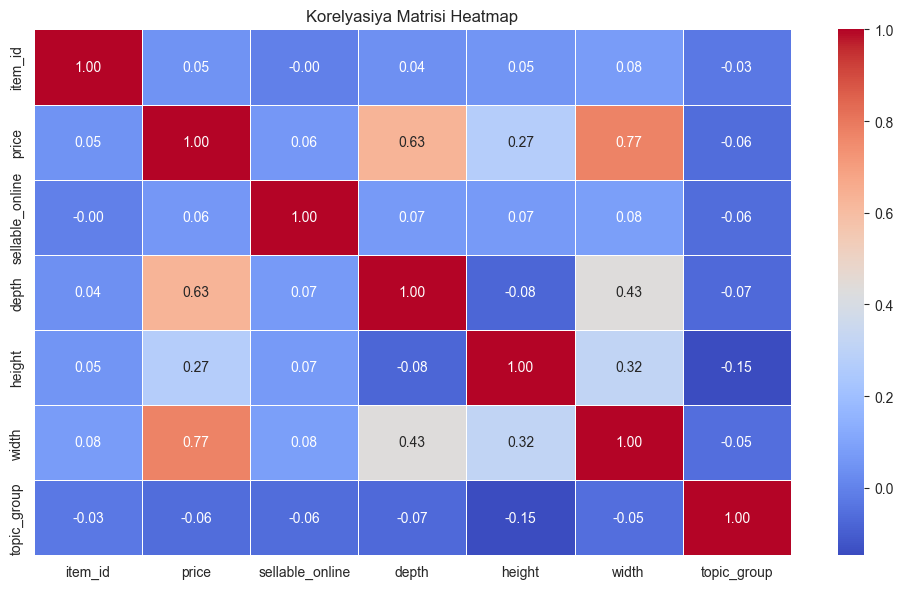

In [46]:
data_corr = data.dropna(subset=['depth'])

# Korelyasiya matrisini hesablayırıq (yalnız ədədi sütunlar üçün)
correlation_matrix = data_corr.corr(numeric_only=True)

# Heatmap plotu
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelyasiya Matrisi Heatmap")
plt.tight_layout()
plt.show()

KNI Imputer

In [49]:
from sklearn.impute import KNNImputer

data_encoded = pd.get_dummies(data, columns=['category'], drop_first=True)

imputer = KNNImputer(n_neighbors=5)
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

data_encoded[numeric_cols] = imputer.fit_transform(data_encoded[numeric_cols])
data['depth'] = data_encoded['depth']

/Users/sevinjrahimova/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sevinjrahimova/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sevinjrahimova/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [50]:
data["depth"].isnull().sum()

np.int64(0)

In [51]:
data.columns

Index(['item_id', 'name', 'category', 'price', 'old_price', 'sellable_online',
       'link', 'other_colors', 'short_description', 'designer', 'depth',
       'height', 'width', 'product_description', 'current_status', 'keywords',
       'topic_group', 'topic_desc'],
      dtype='object')

In [52]:
data_encoded = pd.get_dummies(data, columns=['category'], drop_first=True)
numeric_cols = data_encoded.select_dtypes(include=['float64', 'int64']).columns

data_encoded[numeric_cols] = imputer.fit_transform(data_encoded[numeric_cols])

data['width'] = data_encoded['width']
data['height'] = data_encoded['height']

/Users/sevinjrahimova/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/sevinjrahimova/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/sevinjrahimova/.venv/lib/python3.12/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


In [55]:
data.shape

(3694, 18)

In [56]:
print(data.isnull().sum())

item_id                   0
name                      0
category                  0
price                     0
old_price                 0
sellable_online           0
link                      0
other_colors              0
short_description         0
designer                  0
depth                     0
height                    0
width                     0
product_description       0
current_status            0
keywords               2300
topic_group            2285
topic_desc             2285
dtype: int64


In [59]:
data['keywords'].fillna('', inplace=True)
data['topic_group'].fillna('', inplace=True)
data['topic_desc'].fillna('', inplace=True)

In [60]:
print(data.isnull().sum())

item_id                0
name                   0
category               0
price                  0
old_price              0
sellable_online        0
link                   0
other_colors           0
short_description      0
designer               0
depth                  0
height                 0
width                  0
product_description    0
current_status         0
keywords               0
topic_group            0
topic_desc             0
dtype: int64


Boolean Conversion: Ensure the sellable_online column is a proper boolean type.

In [61]:
data['sellable_online'] = data['sellable_online'].astype(bool)

/var/folders/l3/7gwh0chs17vchgqqqlvfykrc0000gn/T/ipykernel_2515/1308703577.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sellable_online', data=data, palette='Set2')


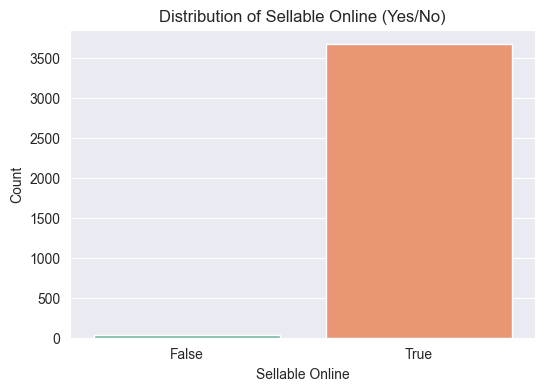

In [63]:
data['sellable_online'].value_counts()

# Plot the distribution of 'yes' and 'no'
plt.figure(figsize=(6, 4))
sns.countplot(x='sellable_online', data=data, palette='Set2')
plt.title('Distribution of Sellable Online (Yes/No)')
plt.xlabel('Sellable Online')
plt.ylabel('Count')
plt.show()

Exploratory Data Analysis (EDA) Tasks:

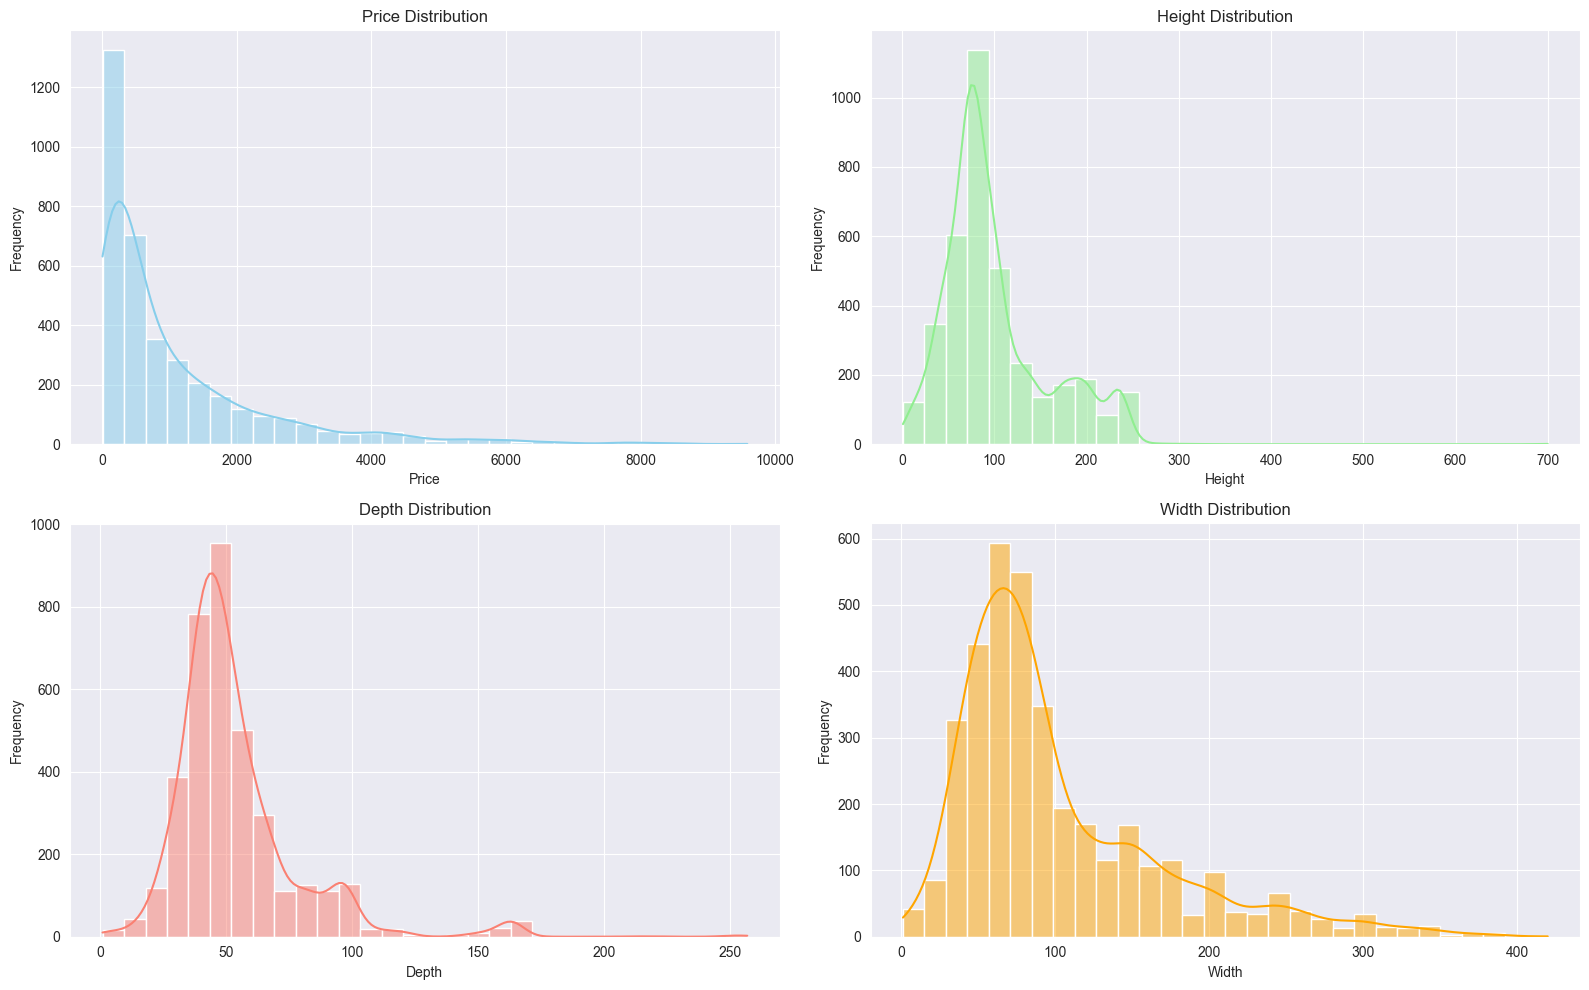

In [65]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
sns.histplot(data['price'], kde=True, color='skyblue', bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(data['height'], kde=True, color='lightgreen', bins=30)
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(data['depth'], kde=True, color='salmon', bins=30)
plt.title('Depth Distribution')
plt.xlabel('Depth')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(data['width'], kde=True, color='orange', bins=30)
plt.title('Width Distribution')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


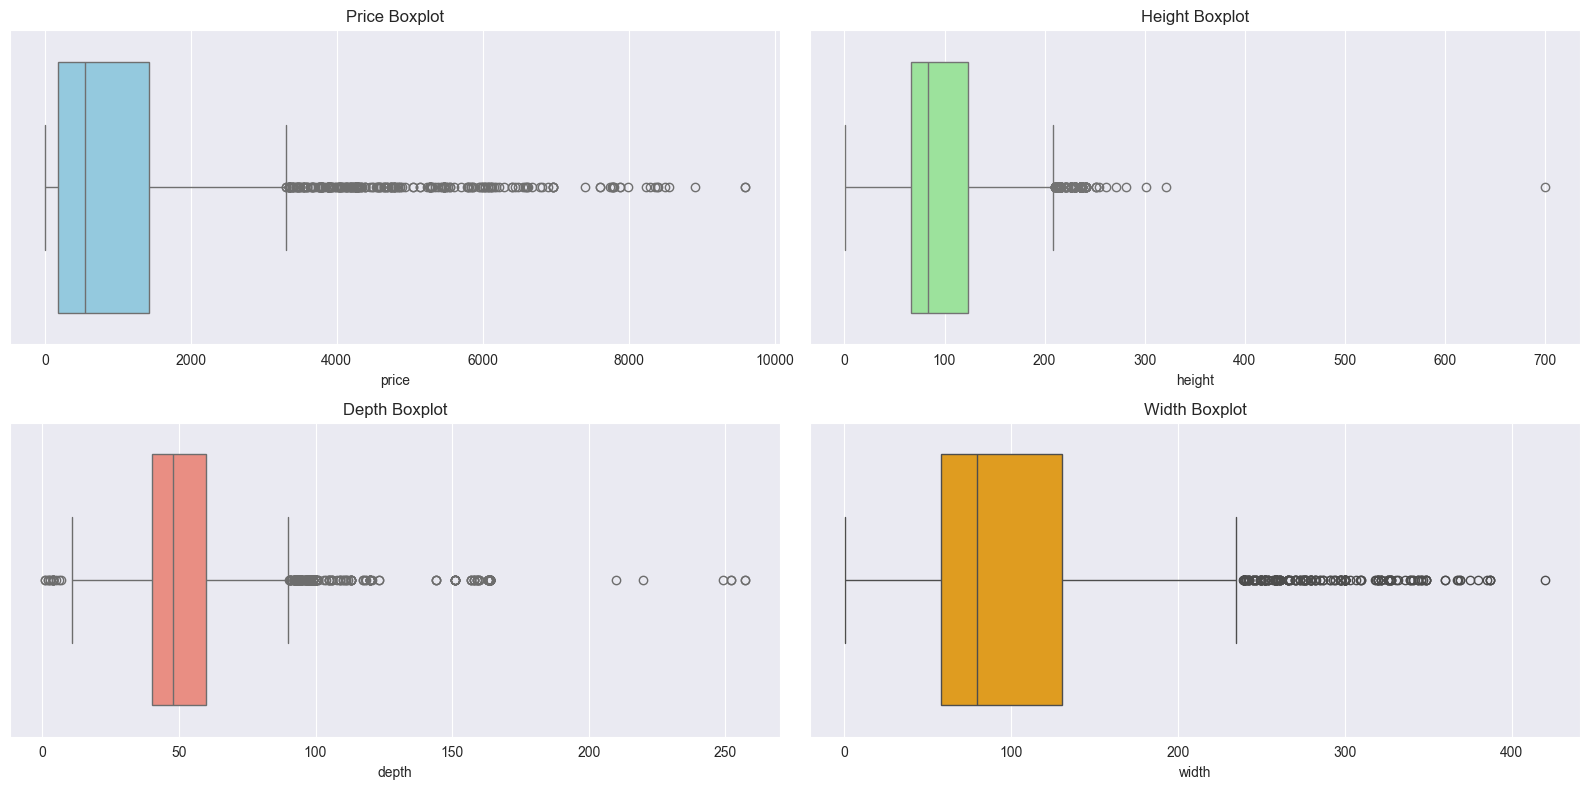

In [66]:
# Box plots for price, height, depth, and width
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=data['price'], color='skyblue')
plt.title('Price Boxplot')

plt.subplot(2, 2, 2)
sns.boxplot(x=data['height'], color='lightgreen')
plt.title('Height Boxplot')

plt.subplot(2, 2, 3)
sns.boxplot(x=data['depth'], color='salmon')
plt.title('Depth Boxplot')

plt.subplot(2, 2, 4)
sns.boxplot(x=data['width'], color='orange')
plt.title('Width Boxplot')

plt.tight_layout()
plt.show()

Category Insights: Find the most common product categories and their average prices.

In [68]:
most_common_category = data['category'].value_counts().idxmax()
category_counts = data['category'].value_counts()

print(f"Most common product category: {most_common_category}")
print(f"Count of most common category: {category_counts[most_common_category]}")

print("\nAll category counts:")
print(category_counts)

Most common product category: Tables & desks
Count of most common category: 612

All category counts:
category
Tables & desks                          612
Bookcases & shelving units              548
Chairs                                  481
Sofas & armchairs                       428
Cabinets & cupboards                    292
Wardrobes                               236
Outdoor furniture                       216
Beds                                    208
TV & media furniture                    190
Chests of drawers & drawer units        125
Children's furniture                    124
Nursery furniture                        97
Bar furniture                            47
Trolleys                                 28
Caf√© furniture                          26
Sideboards, buffets & console tables     23
Room dividers                            13
Name: count, dtype: int64
